In [1]:
from suspension import Suspension
from vehicle import Vehicle
from aerodynamics import Aerodynamics
import math as deez_nuts
from scipy.optimize import fsolve as josie_solver
import residual
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



suspension = Suspension()
aero = Aerodynamics()
vehicle = Vehicle(suspension, aero)
specific_residual_func = lambda x: residual.DOF6_motion_residuals(x, vehicle)

# initial_guess (outputs) = ride_height, x_double_dot, y_double_dot, yaw_acceleration, roll, pitch
initial_guess = [0.0761, 0, 0, 0, 0, 0]

data = []
for x_dot in np.linspace(30,30,1):
    for body_slip in np.linspace(-0.18, 0.18, 30):
        for steered_angle in np.linspace(-3, 3, 50):
            for yaw_rate in np.linspace(0.1, 0.1, 1):
                vehicle.state.body_slip = body_slip
                vehicle.state.steered_angle = steered_angle
                vehicle.state.x_dot = x_dot
                vehicle.state.yaw_rate = yaw_rate

                output_states = josie_solver(specific_residual_func, initial_guess)
                data.append([x_dot, body_slip, steered_angle, yaw_rate, *output_states])

[ 6.80312812e-02 -5.80133796e+00  1.23708381e+01 -4.43899357e+01
 -1.19045350e-02  4.61319125e-06]


Text(0.5, 0, 'Lateral Acceleration (g)')

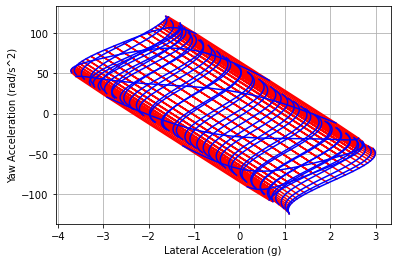

In [3]:
columns = ["x_dot", "body_slip", "steered_angle", "yaw_rate",
                             "ride_height", "x_double_dot", "y_double_dot", "yaw_acceleration", "roll", "pitch"]

df = pd.DataFrame(data, columns = columns)
df.to_csv("MMM.csv")
for x in df["body_slip"].unique():
    df2 = df[df["body_slip"] == x]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'r')

for x in df["steered_angle"].unique():
    df2 = df[(df["steered_angle"] == x)]
    plt.plot(df2["y_double_dot"]/9.81, df2["yaw_acceleration"], 'b')
plt.grid()
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (g)")
#plt.scatter()
#df.head
